# The Gapminder Project

Gapminder is a non-profit that highlights global development using statistical data. Popularized by Hans Rosling, its dataset includes metrics like life expectancy, GDP per capita, population, child mortality, fertility rate, and education levels. One of its renowned tools is the "bubble chart," which visualizes country development over time in terms of health and wealth. 

In this project, I aim to recreate the renowned bubble chart.

In [1]:
import pandas as pd
fert = pd.read_csv("./data/gapminder_total_fertility.csv", index_col=0)
life = pd.read_excel("./data/gapminder_lifeexpectancy.xlsx", index_col=0)
pop = pd.read_excel("./data/gapminder_population.xlsx", index_col=0)
continent = pd.read_csv("./data/continents.csv", index_col=0, sep = ";")


In [2]:
fert.shape, life.shape, pop.shape, continent.shape

((260, 216), (260, 217), (275, 81), (194, 1))

In [3]:
fert.head(3)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
life.head(3)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pop.head(3)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
continent.head(3)

,country
continent,
Africa,Algeria
Africa,Angola
Africa,Benin


#### NOTE: Because population and fertility dataframes don't have the data for 2016, we will drop this column from life data.


In [7]:
life = life.drop(2016, axis=1)
life.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.1,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.4,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.0,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4


In [8]:
fert.columns = fert.columns.astype(int)

In [9]:
life.columns = life.columns.astype(int)

In [10]:
pop.columns = pop.columns.astype(int)

In [11]:
continent.columns

Index(['country'], dtype='object')

In [12]:
fert.index.name = 'country'
life.index.name = "country"
pop.index.name = "country"
pop.head()

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
country,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15700.0,15700.0,15700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,410445.0,423591.0,438671.0,457234.0,478227.0,506889.0,552800.0,610036.0,672544.0,741688.0,...,3050741.0,3010849.0,2968026.0,2929886.0,2901883.0,2886010.0,2880667.0,2883281.0,2889676.0,2896679.0
Algeria,2503218.0,2595056.0,2713079.0,2880355.0,3082721.0,3299305.0,3536468.0,3811028.0,4143163.0,4525691.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0


In [13]:
fert = fert.reset_index()
life = life.reset_index()
pop = pop.reset_index()
continent = continent.reset_index()

In [14]:
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')

In [15]:
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')

In [16]:
pop = pop.melt(id_vars="country", var_name="year", value_name="population")

In [17]:
life.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82



### Merging the dataframes for the visualization.

In [18]:
df = fert.merge(pop, how = "left", on = ["country", "year"])
df = df.merge(life, how = "left", on = ["country", "year"])
df = df.merge(continent, how = "inner", on = "country")
df.head()

,country,year,fertility_rate,population,life_expectancy,continent
0,Afghanistan,1800,7.0,3280000.0,28.21,Asia
1,Afghanistan,1801,7.0,NaN,28.20,Asia
2,Afghanistan,1802,7.0,NaN,28.19,Asia
3,Afghanistan,1803,7.0,NaN,28.18,Asia
4,Afghanistan,1804,7.0,NaN,28.17,Asia


In [19]:
df.shape

(38232, 6)

# PLOTS

## Seaborn

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

(1.0, 9.0)

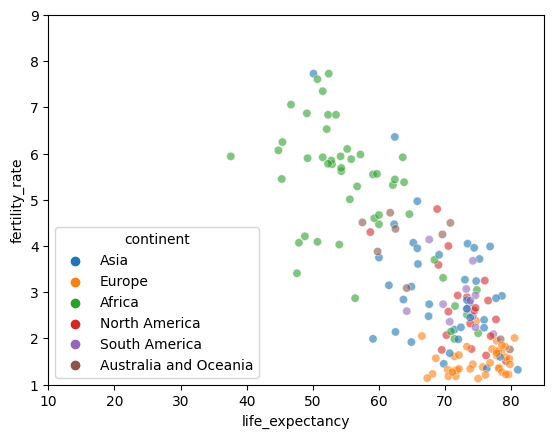

In [97]:
# In a single year 
df_subset = df.loc[df['year'] == 2000]
sns.scatterplot(x='life_expectancy', y='fertility_rate', hue="continent",
            data=df_subset, alpha=0.6)
plt.xlim(10, 85)
plt.ylim(1, 9)




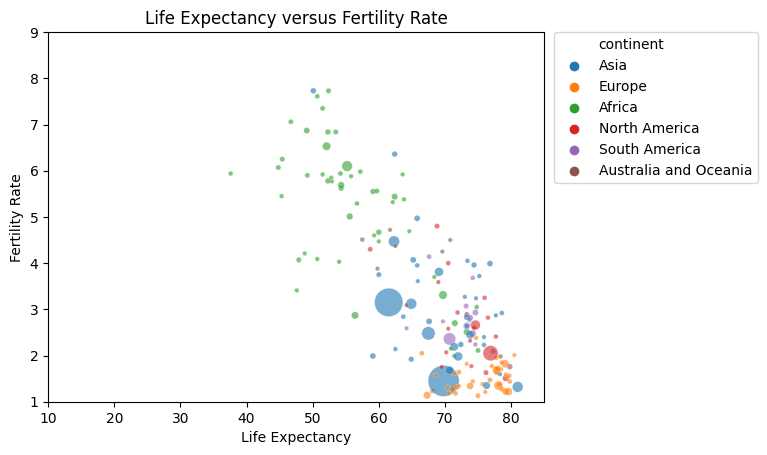

In [98]:
df_subset = df.loc[df['year'] == 2000]
sns.scatterplot(x='life_expectancy',
                y='fertility_rate',
                hue="continent",
                size = "population",
                sizes=(10, 500),
                data=df_subset,
                alpha=0.6,
               )
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Life Expectancy versus Fertility Rate')
# Set x-axis label
plt.xlabel('Life Expectancy')
# Set y-axis label
plt.ylabel('Fertility Rate')
plt.xlim(10, 85)
plt.ylim(1, 9)
p = plt.subplot()
h,l = p.get_legend_handles_labels()
plt.legend(h[0:7], l[0:7], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout
plt.savefig("life_x2.png", bbox_inches='tight')

In [29]:
subset_df = df[df['year'] > 1959]
subset_df

,country,year,fertility_rate,population,life_expectancy,continent
160,Afghanistan,1960,7.67,8994793.0,31.94,Asia
161,Afghanistan,1961,7.67,9164945.0,32.47,Asia
162,Afghanistan,1962,7.67,9343772.0,33.01,Asia
163,Afghanistan,1963,7.67,9531555.0,33.53,Asia
164,Afghanistan,1964,7.67,9728645.0,34.07,Asia
...,...,...,...,...,...,...
38227,Zimbabwe,2011,3.64,14255592.0,51.60,Africa
38228,Zimbabwe,2012,3.56,14565482.0,54.20,Africa
38229,Zimbabwe,2013,3.49,14898092.0,55.70,Africa
38230,Zimbabwe,2014,3.41,15245855.0,57.00,Africa


In [ ]:
def plot_sns(dataframe):
    sns.scatterplot(
        x='life_expectancy',
        y='fertility_rate',
        data=dataframe,
        hue="continent",
        size = "population",
        sizes=(15, 2000),
        alpha=0.6
    );  
    plt.title('Life Expectancy versus Fertility Rate')
    plt.xlabel('Life Expectancy')
    plt.ylabel('Fertility Rate')
    plt.xlim(10, 85)
    plt.ylim(1, 9)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    p = plt.subplot()
    h,l = p.get_legend_handles_labels()
    plt.legend(h[0:7], l[0:7], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.tight_layout()

In [ ]:
# To test the function we will subset 2000 
df_2000 = subset_df[subset_df["year"]==2000]

In [ ]:
# Now we will apply it on the that subset
plot_sns(df_2000)
plt.savefig("life_2000.png")

** For loop to save all the years in the subset **

In [ ]:
for year in range(1960, 2016):
    cur_subset_df = df[df['year'] == year]
    plot_sns(cur_subset_df)
    plt.savefig(f"output_{year}.png")
    plt.clf()

In [ ]:
#pip install imageio

In [ ]:
import imageio.v2

images = []

for i in range(1960, 2016):
    life_gif = 'output_{}.png'.format(i)
    images.append(imageio.v2.imread(life_gif))

imageio.v2.mimsave('life_fun.gif', images, fps=20)

# Plotly

In [21]:
#import plotly.graph_objects as go
import plotly.express as px

In [30]:
df_subset=df[df["year"]>1959]
df_subset.head()

In [92]:
fig = px.scatter(
    data_frame = df_subset,
    x='life_expectancy',
    y='fertility_rate',
    title="Life Expectancy versus Fertility Rate",
    color="continent",
    size = "population",
    size_max=50,
    animation_frame="year",
    animation_group="country",
    hover_name="country"
)
fig.update_xaxes(title_text="Life Expectancy")
fig.update_yaxes(title_text="Fertility Rate")
fig.update_layout(xaxis_range=[10,85])
fig.update_layout(yaxis_range=[0,9])
fig.show()